<a href="https://colab.research.google.com/github/akshayakannan05/akshayakannan05/blob/main/MNIST_handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
After reshaping: (60000, 28, 28, 1) (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.8831 - loss: 0.3879 - val_accuracy: 0.9811 - val_loss: 0.0576
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9805 - loss: 0.0616 - val_accuracy: 0.9858 - val_loss: 0.0429
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9893 - loss: 0.0352 - val_accuracy: 0.9899 - val_loss: 0.0309
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9912 - loss: 0.0292 - val_accuracy: 0.9894 - val_loss: 0.0331
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9934 - loss: 0.0200 - val_accuracy: 0.9894 - val_loss: 0.0322
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9846 - loss: 0.0424

Test Accuracy: 0.9894000291824341


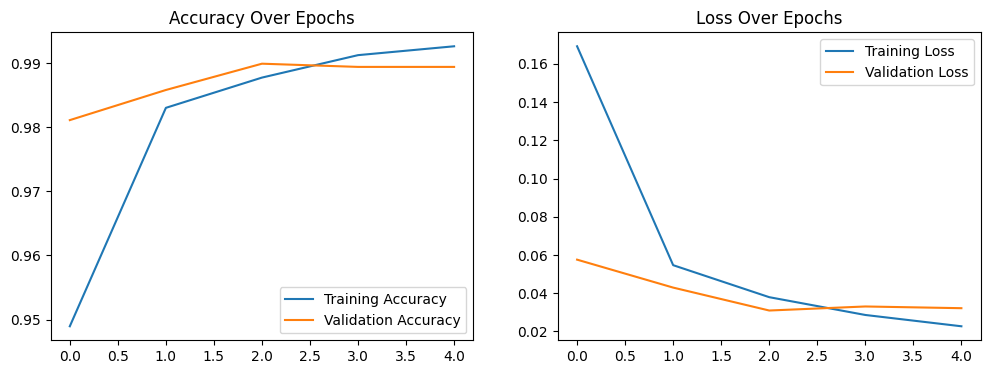

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


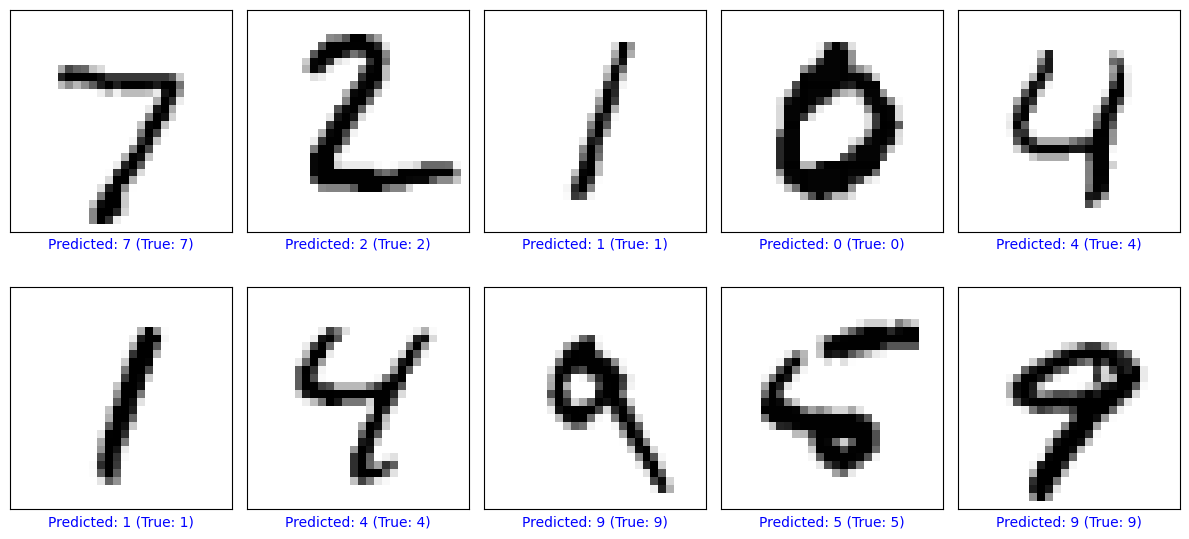

In [2]:
!pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print("After reshaping:", x_train.shape, x_test.shape)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

predictions = model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i].reshape(28,28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Predicted: {predicted_label} (True: {true_label})", color=color)

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()
